<a href="https://colab.research.google.com/github/pranaysawant17/Python-Projects/blob/main/APJ_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u> IPL Data Analysis</u> </center>

## 1. Importing the necessary libraries

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

 Loading Dataset

In [114]:
balls = pd.read_csv('/content/drive/MyDrive/IPL/IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('/content/drive/MyDrive/IPL/IPL Matches 2008-2020.csv')

First 5 rows of datasets

In [115]:
balls.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [116]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


Renaming the columns

In [117]:

cols_to_rename={}
for i in balls.columns:
  cols_to_rename[i]=i.title()

cols1_to_rename={}
for i in matches.columns:
  cols1_to_rename[i]=i.title()


In [118]:
balls.rename(columns=cols_to_rename,inplace=True)
balls.head(2)

,Id,Inning,Over,Ball,Batsman,Non_Striker,Bowler,Batsman_Runs,Extra_Runs,Total_Runs,Non_Boundary,Is_Wicket,Dismissal_Kind,Player_Dismissed,Fielder,Extras_Type,Batting_Team,Bowling_Team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [119]:
matches.rename(columns = cols1_to_rename, inplace=True)
matches.head(2)

,Id,City,Date,Player_Of_Match,Venue,Neutral_Venue,Team1,Team2,Toss_Winner,Toss_Decision,Winner,Result,Result_Margin,Eliminator,Method,Umpire1,Umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


###Replacing the team names to their short forms.

Following consideratons are taken

Delhi Daredevils = Delhi Capitals = DC

Deccan Chargers = Sun Risers Hydrabad =SRH

Pune Warriors = Rising Pune Supergiants =RPS

In [120]:


x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','RPS','RPS','DC']

matches.replace(x,y,inplace = True)
balls.replace(x,y,inplace = True)



## Descriptive Statistics

### Shape of databases

In [121]:
print("Number of rows in balls dataset", balls.shape[0])
print("Number of columns in balls dataset", balls.shape[1])

Number of rows in balls dataset 193468
Number of columns in balls dataset 18


In [122]:
print("Number of rows in matches dataset", matches.shape[0])
print("Number of columns in matches dataset", matches.shape[1])

Number of rows in matches dataset 816
Number of columns in matches dataset 17


### Checking info of datasets

In [123]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Id                193468 non-null  int64 
 1   Inning            193468 non-null  int64 
 2   Over              193468 non-null  int64 
 3   Ball              193468 non-null  int64 
 4   Batsman           193468 non-null  object
 5   Non_Striker       193468 non-null  object
 6   Bowler            193468 non-null  object
 7   Batsman_Runs      193468 non-null  int64 
 8   Extra_Runs        193468 non-null  int64 
 9   Total_Runs        193468 non-null  int64 
 10  Non_Boundary      193468 non-null  int64 
 11  Is_Wicket         193468 non-null  int64 
 12  Dismissal_Kind    9495 non-null    object
 13  Player_Dismissed  9495 non-null    object
 14  Fielder           6784 non-null    object
 15  Extras_Type       10233 non-null   object
 16  Batting_Team      193468 non-null  obj

In [124]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               816 non-null    int64  
 1   City             803 non-null    object 
 2   Date             816 non-null    object 
 3   Player_Of_Match  812 non-null    object 
 4   Venue            816 non-null    object 
 5   Neutral_Venue    816 non-null    int64  
 6   Team1            816 non-null    object 
 7   Team2            816 non-null    object 
 8   Toss_Winner      816 non-null    object 
 9   Toss_Decision    816 non-null    object 
 10  Winner           812 non-null    object 
 11  Result           812 non-null    object 
 12  Result_Margin    799 non-null    float64
 13  Eliminator       812 non-null    object 
 14  Method           19 non-null     object 
 15  Umpire1          816 non-null    object 
 16  Umpire2          816 non-null    object 
dtypes: float64(1), i

 Matches in Every Season

In [125]:
matches["Year"]= matches.Date.astype('datetime64[Y]').dt.year
matches.head(2)

,Id,City,Date,Player_Of_Match,Venue,Neutral_Venue,Team1,Team2,Toss_Winner,Toss_Decision,Winner,Result,Result_Margin,Eliminator,Method,Umpire1,Umpire2,Year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


In [126]:
matches.Year.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: Year, dtype: int64

Observations 

We can see that in season 2013 maximum 76 matches were played.

Text(0, 0.5, 'No.of Matches')

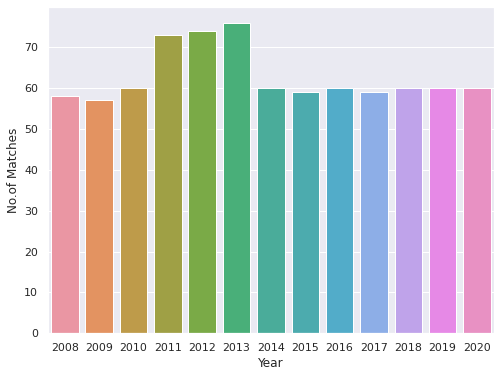

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(data=matches, x='Year') 
plt.ylabel("No.of Matches")

Matches Played vs Wins by Each Team

In [128]:
total_match=matches['Team1'].value_counts() + matches['Team2'].value_counts()
total_match

CSK     178
DC      194
GL       30
KKR     192
KTK      14
KXIP    190
MI      203
RCB     195
RPS      76
RR      161
SRH     199
dtype: int64

MI played most number of matches with total of 203.

KTK played least number of matches with total of 14

In [129]:
winner=matches['Winner'].value_counts()
winner

MI      120
CSK     106
KKR      99
SRH      95
RCB      91
KXIP     88
DC       86
RR       81
RPS      27
GL       13
KTK       6
Name: Winner, dtype: int64

MI has won most matches with total of 120.

KTK has won only 6 matches which is the least.

Text(0, 0.5, 'Number of matches')

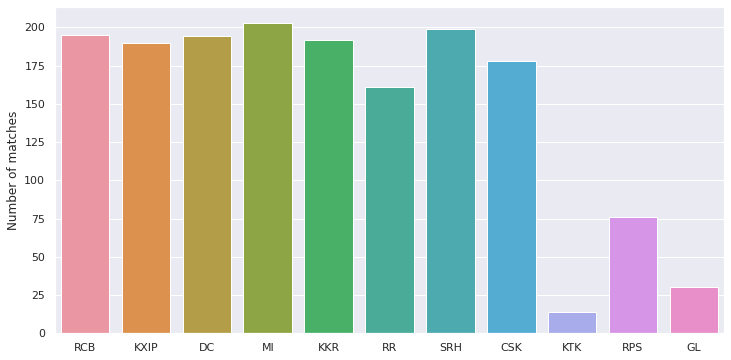

In [170]:
plt.figure(figsize=(12,6))
sns.countplot(x=pd.concat([matches['Team1'],matches['Team2']]))
plt.ylabel('Number of matches')


In [131]:
print("Top 5 Teams according to winning percentage")
win_p= round(winner/total_match,3)*100
win_p.sort_values(ascending=False).head()

Top 5 Teams according to winning percentage


CSK    59.6
MI     59.1
KKR    51.6
RR     50.3
SRH    47.7
dtype: float64

Venue of Most Matches:


In [132]:
matches.Venue.value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

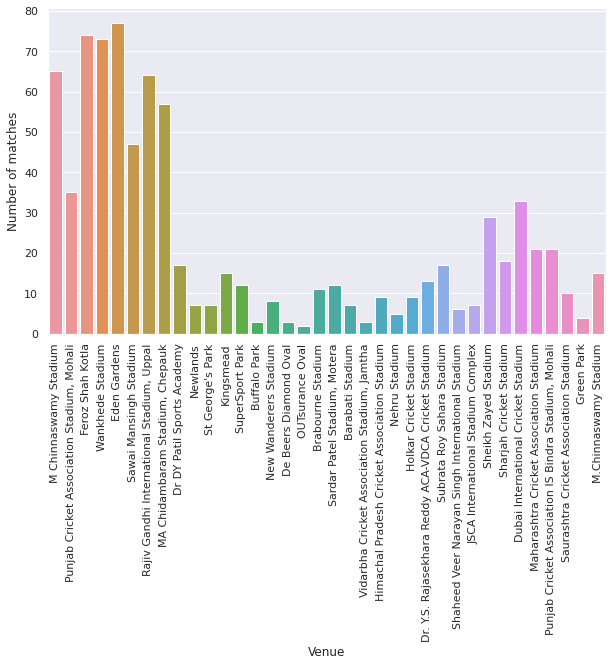

In [173]:
plt.figure(figsize=(10,6))
sns.countplot(x=matches["Venue"])
#plt.setp(plot.get_xticklabels(), rotation=90)
plt.ylabel("Number of matches")
plt.xticks(rotation = 'vertical')

Eden garden has been the most played venue with 77 matches.

Top 5 Umpires

In [134]:
print("Top 5 Umpires")
pd.concat([matches['Umpire1'],matches['Umpire2']]).value_counts().sort_values(ascending=False).head()

Top 5 Umpires


S Ravi             121
HDPK Dharmasena     94
AK Chaudhary        87
C Shamshuddin       82
M Erasmus           65
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

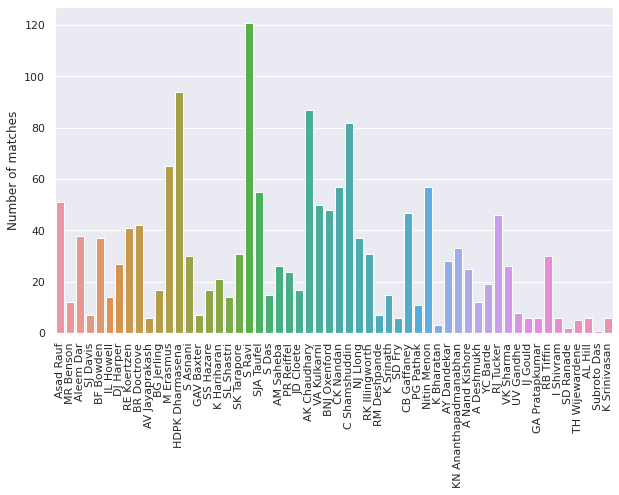

In [174]:
plt.figure(figsize=(10,6))
sns.countplot(x=pd.concat([matches['Umpire1'],matches['Umpire2']]))
#plt.setp(plot.get_xticklabels(), rotation=90)
plt.ylabel("Number of matches")
plt.xticks(rotation = 'vertical')

S Ravi umpired most number of maches which are 121.

Toss Decision

Text(0, 0.5, 'Number of matches')

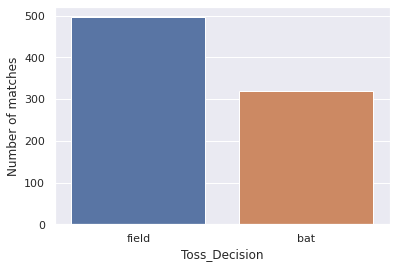

In [175]:
sns.countplot(x=matches['Toss_Decision'])
plt.ylabel("Number of matches")

After winning the toss many team decided to field than bat.

##Runs per Season¶

Average and Total Runs

In [137]:
Year_match=matches[['Id','Year']].merge(balls, left_on = 'Id', right_on = 'Id', how = 'left').drop('Id', axis = 1)
Year_match.head(2)

,Year,Inning,Over,Ball,Batsman,Non_Striker,Bowler,Batsman_Runs,Extra_Runs,Total_Runs,Non_Boundary,Is_Wicket,Dismissal_Kind,Player_Dismissed,Fielder,Extras_Type,Batting_Team,Bowling_Team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [168]:
season=Year_match.groupby(['Year'])['Total_Runs'].sum().reset_index()
season.sort_values(by='Total_Runs')

,Year,Total_Runs
1,2009,16320
0,2008,17937
7,2015,18332
9,2017,18769
8,2016,18862
2,2010,18864
6,2014,18909
12,2020,19352
11,2019,19400
10,2018,19901


In [169]:
avgruns_season=matches.groupby(['Year']).count().Id.reset_index()
avgruns_season.rename(columns={'Id':'Matches'},inplace=1)
avgruns_season['Total_Runs']=season['Total_Runs']
avgruns_season['Average_Runs_Per_Match']=avgruns_season['Total_Runs']/avgruns_season['Matches']
avgruns_season

,Year,Matches,Total_Runs,Average_Runs_Per_Match
0,2008,58,17937,309.258621
1,2009,57,16320,286.315789
2,2010,60,18864,314.400000
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22541,296.592105
6,2014,60,18909,315.150000
7,2015,59,18332,310.711864
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


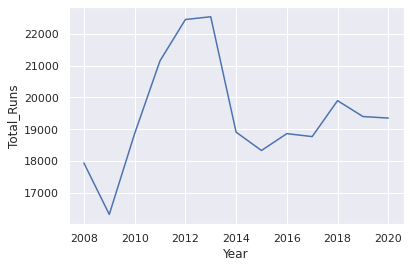

In [140]:
sns.lineplot(data=avgruns_season, x='Year',y='Total_Runs')


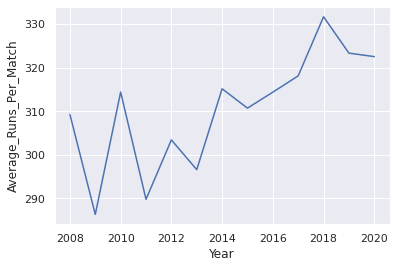

In [141]:
sns.lineplot(data=avgruns_season, x='Year',y='Average_Runs_Per_Match')

Most runs were scored in Year 2013 season of IPL. Which are	22541.

Year 2018 season of had most average runs per match 331.683333

Distribution of Boundaries and Sixes

In [142]:

b=Year_match.query("Batsman_Runs==4")
b[['Year','Batsman_Runs']].value_counts()

Year  Batsman_Runs
2013  4               2052
2011  4               1916
2012  4               1911
2010  4               1708
2008  4               1703
2019  4               1653
2018  4               1652
2016  4               1633
2017  4               1611
2015  4               1607
2020  4               1583
2014  4               1562
2009  4               1317
dtype: int64

In [143]:
s=Year_match.query("Batsman_Runs==6")
s[['Year','Batsman_Runs']].value_counts()

Year  Batsman_Runs
2018  6               872
2019  6               784
2020  6               735
2012  6               733
2014  6               714
2017  6               705
2015  6               692
2013  6               675
2011  6               639
2016  6               639
2008  6               623
2010  6               585
2009  6               506
dtype: int64

In 2013 season of IPL most boundaries 2052 were scored.

2018 season of IPL holds most sixes record with 872 sixes.

Highest Scoring Innings

In [144]:
h_s=balls.groupby(['Id','Inning','Batting_Team'])['Total_Runs'].sum().reset_index()
h_s.nlargest(10,'Total_Runs')

,Id,Inning,Batting_Team,Total_Runs
701,598027,1,RCB,263
1118,980987,1,RCB,248
292,419137,1,CSK,246
1356,1136604,1,KKR,245
2,335983,1,CSK,240
1002,829795,1,RCB,235
472,501260,1,KXIP,232
1482,1178422,1,KKR,232
398,501223,1,DC,231
851,733987,1,KXIP,231


RCB holds record of most runs in inning with 263 runs scored

Number of times team scored more than 200

In [145]:
t_s=h_s.query('Total_Runs>=200')
t_s.Batting_Team.value_counts()

RCB     19
CSK     17
KXIP    14
MI      14
SRH     13
KKR     12
RR       9
DC       7
GL       1
Name: Batting_Team, dtype: int64

RCB has scored more 200 + scores innings with 19 innings

Number of times team scored more than 200 in Inning 1

In [146]:
inn1=h_s.query('Total_Runs>=200 & Inning==1')
inn1.Batting_Team.value_counts()

RCB     17
CSK     11
SRH     11
MI      11
KKR      8
KXIP     8
DC       6
RR       5
GL       1
Name: Batting_Team, dtype: int64

RCB has scored most innings 1 200+ runs score with 17 innings

Number of times team scored more than 200 in Inning 2

In [147]:
inn1=h_s.query('Total_Runs>=200 & Inning==2')
inn1.Batting_Team.value_counts()

KXIP    6
CSK     6
RR      4
KKR     4
MI      3
RCB     2
SRH     2
DC      1
Name: Batting_Team, dtype: int64

In innings 2 both KXIP and CSK have scored 200+ scores 6 times.

Top 10 High Scorers

In [148]:
b_s=balls.groupby(['Id','Inning','Batting_Team','Batsman'])['Total_Runs'].sum().reset_index()
b_s[['Batsman','Total_Runs']].nlargest(10,'Total_Runs')

,Batsman,Total_Runs
5298,CH Gayle,181
0,BB McCullum,169
11578,KL Rahul,140
7528,AB de Villiers,138
8359,AB de Villiers,132
3569,AC Gilchrist,130
10147,RR Pant,130
4686,CH Gayle,129
6845,V Sehwag,129
2234,M Vijay,128


CH Gayle holds record for highest scores with 181 runs.

Top 10 Batsman with most hundreds

In [149]:
hundred_scorer= b_s.query('Total_Runs>=100')
hundred_scorer.Batsman.value_counts().head(10)

CH Gayle          10
V Kohli            6
SR Watson          4
DA Warner          4
V Sehwag           3
KL Rahul           3
AB de Villiers     3
SK Raina           3
AM Rahane          3
S Dhawan           3
Name: Batsman, dtype: int64

CH Gayle has score most number of hundreds with count of 10.

Top 10 Batsman with most Fifties

In [150]:
fifty_scorer= b_s.query('Total_Runs<100 & Total_Runs>=50')
fifty_scorer.Batsman.value_counts().head(10)

DA Warner         51
S Dhawan          43
RG Sharma         42
V Kohli           41
AB de Villiers    38
G Gambhir         38
SK Raina          37
CH Gayle          31
AM Rahane         28
RV Uthappa        26
Name: Batsman, dtype: int64

DA Warner holds record for most fifties with scoring it for 51 times

Top 10 Batsman with Most Runs Scored

In [151]:
R_S=balls.groupby(['Batsman'])['Total_Runs'].sum().reset_index()


In [152]:
Top_Score=R_S.nlargest(10,'Total_Runs')

Top_Score

,Batsman,Total_Runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
96,CH Gayle,5103
24,AB de Villiers,5016
398,RV Uthappa,4878
301,MS Dhoni,4855
154,G Gambhir,4479


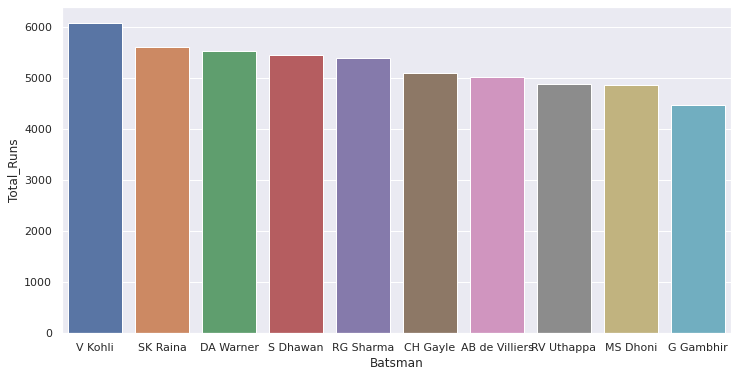

In [153]:
plt.figure(figsize=(12,6))
sns.barplot(y=Top_Score.Total_Runs, x=Top_Score.Batsman)

V Kohli is top scorer of IPL considering all sesons with 6081 runs scored.

In [154]:
Score=Year_match.groupby(['Year','Batsman'])['Total_Runs'].sum().reset_index()
Top_Score=Score.sort_values(by='Total_Runs',ascending=False).drop_duplicates('Year')
Top_Score

,Year,Batsman,Total_Runs
1383,2016,V Kohli,998
852,2013,CH Gayle,766
684,2012,CH Gayle,762
1594,2018,KS Williamson,747
1694,2019,DA Warner,727
1866,2020,KL Rahul,690
1088,2014,RV Uthappa,681
1422,2017,DA Warner,670
446,2010,SR Tendulkar,665
115,2008,SE Marsh,644


V Kohli scored 998 runs in Year 2016 season of IPL which is the most runs scored in single season.

Both DA Warner and CH Gayle were top scorers for 3 times each.

## Bowler Stats

Top 10 Wicket Takers

In [155]:
Year_match.Dismissal_Kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [156]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=balls[balls["Dismissal_Kind"].isin(dismissal_kinds)]

In [157]:
bowler_list = pd.DataFrame(ct.Bowler.value_counts())
bowler_list.reset_index(inplace=True)
bowler_list.rename(columns= {'index':'Bowler_name','Bowler':'Wickets'}, inplace=True)

In [158]:
bowler_list.head()

,Bowler_name,Wickets
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150


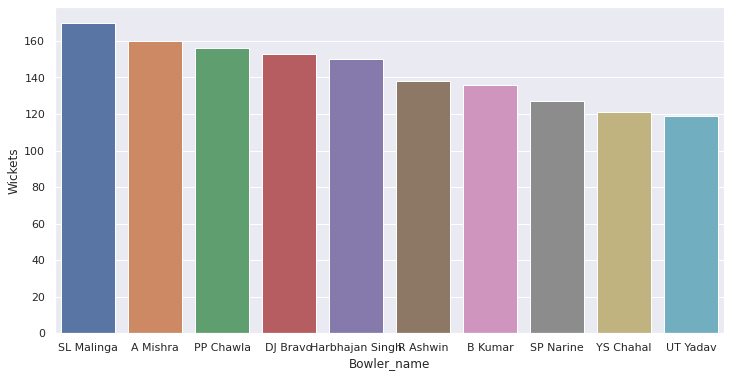

In [159]:
plt.figure(figsize=(12,6))
sns.barplot(y=bowler_list.Wickets, x=bowler_list.Bowler_name.head(10))


SL Mainga has taken 170 wickets in all seasons of IPL which is the highest.

Top wicket takers each session

In [160]:
Wick=Year_match.groupby(['Year','Bowler'])['Dismissal_Kind'].count().reset_index()
Top_Wicket=Wick.sort_values(by='Dismissal_Kind',ascending=False).drop_duplicates('Year')
Top_Wicket

,Year,Bowler,Dismissal_Kind
629,2013,DJ Bravo,34
537,2012,M Morkel,30
447,2011,SL Malinga,30
1382,2020,K Rabada,30
848,2015,DJ Bravo,28
1049,2017,B Kumar,28
1279,2019,K Rabada,28
1145,2018,AJ Tye,28
780,2014,MM Sharma,26
174,2009,RP Singh,26


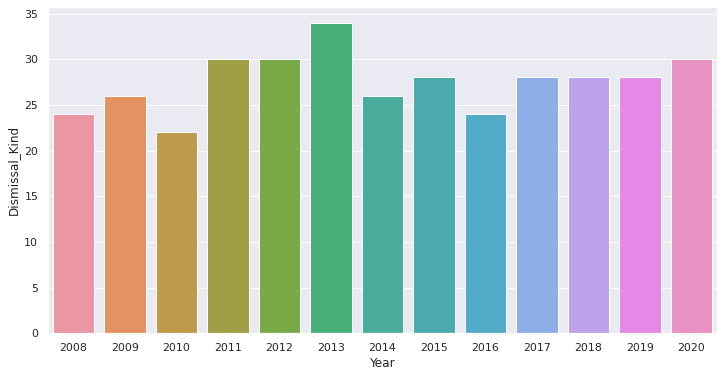

In [161]:
plt.figure(figsize=(12,6))
sns.barplot(y=Top_Wicket.Dismissal_Kind, x=Top_Wicket.Year)

DJ Bravo took most wickets in single season with record of 34 wickets in 2013 session.

DJ Bravo & K Rabada were 2 times purple cap holder for most wickets in season.

##Winner Analysis

Most IPL Trophies won

In [162]:
s_w=matches.drop_duplicates(subset=['Year'], keep='last')[['Year','Winner']].reset_index(drop=True)
s_w = s_w['Winner'].value_counts()

In [163]:
Season_winner=pd.DataFrame(s_w)
Season_winner.reset_index(inplace=True)
Season_winner.rename(columns= {'index':'Team','Winner':'Trophies'}, inplace=True)

In [164]:
Season_winner

,Team,Trophies
0,MI,5
1,CSK,3
2,SRH,2
3,KKR,2
4,RR,1


([<matplotlib.patches.Wedge at 0x7f5b284f3e50>,
 [Text(0.3900653535244525, 1.0285178753817767, 'MI'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'CSK'),
  Text(-0.39006530537605527, -1.0285178936420527, 'SRH'),
  Text(0.6248713159427525, -0.905282187227813, 'KKR'),
  Text(1.0680360337692223, -0.2632470903362633, 'RR')])

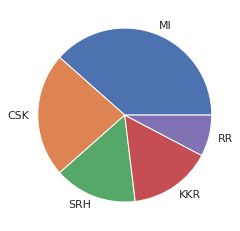

In [165]:
plt.pie(x=Season_winner.Trophies,labels=Season_winner.Team.to_list())

MI has won title of cahmpions for record 5 times in all sesons of IPL.